In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
L = 3.0   # 물체 길이
T_left = 100.0  # 왼쪽 물체 온도
T_right = 50.0  # 오른쪽 물체 온도
T_initial = 20.0   # 초기 온도

alpha = 0.01  # 열전도율

dx = 0.1
dt = 0.005
Nx = int(L/dx)
Nt = 2000  

In [11]:
T = np.ones(Nx) * T_initial
T[0] = T_left
T[-1] = T_right
T_new = np.copy(T)

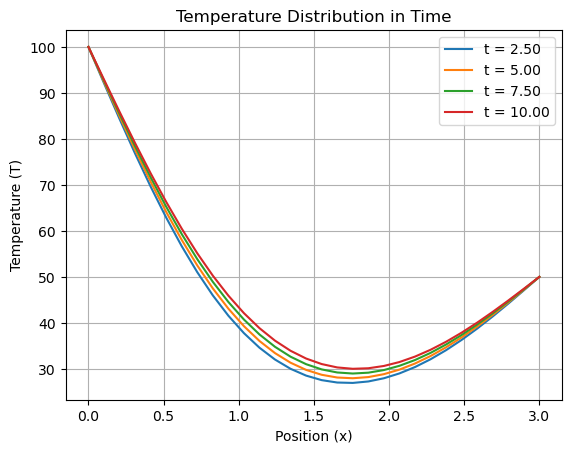

In [21]:
for t in range(1, Nt+1):
    for i in range(1, Nx-1):
        T_new[i] = T[i] + alpha * dt/dx**2 * (T[i+1] - 2*T[i] + T[i-1]) # 열전도 방정식
    T_new[0] = T_left # 왼쪽 경계 조건
    T_new[-1] = T_right # 오른쪽 경계 조건
    T = T_new.copy()

    if t % 500 == 0: 
        plt.plot(np.linspace(0, L, Nx), T, label=f't = {t*dt:.2f}')

plt.title('Temperature Distribution in Time')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.legend()
plt.grid(True)
plt.show()

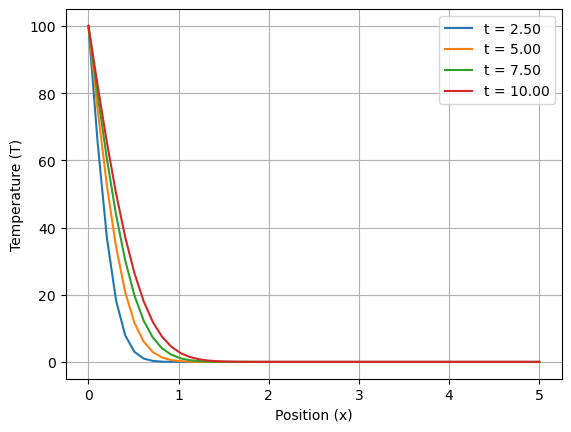

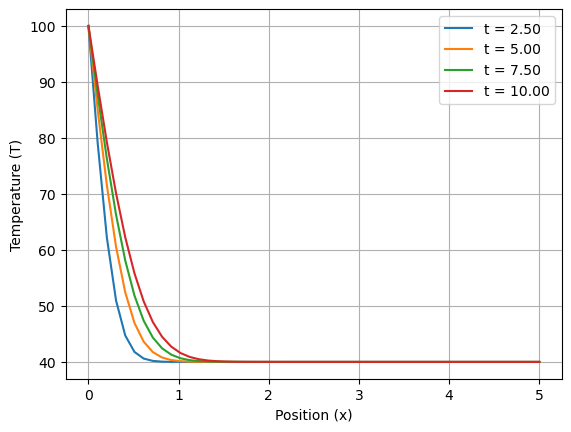

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_thermal_conduction(initial_condition, boundary_condition, Nt=2000):
    L = 5  
    alpha = 0.01  

    dx = 0.1
    dt = 0.005
    Nx = int(L/dx)

    T = initial_condition(Nx)
    T_new = np.copy(T)

    for t in range(1, Nt+1):
        for i in range(1, Nx-1):
            T_new[i] = T[i] + alpha * dt/dx**2 * (T[i+1] - 2*T[i] + T[i-1])
        
        left, right = boundary_condition()
        if left is not None:
            T_new[0] = left
        if right is not None:
            T_new[-1] = right

        T = T_new.copy()

        if t % 500 == 0:
            plt.plot(np.linspace(0, L, Nx), T, label=f't = {t*dt:.2f}')

    plt.xlabel('Position (x)')
    plt.ylabel('Temperature (T)')
    plt.legend()
    plt.grid(True)
    plt.show()

initial_zero = lambda Nx: np.zeros(Nx)
boundary_left_only = lambda: (100, None)
simulate_thermal_conduction(initial_zero, boundary_left_only)

initial_twenty = lambda Nx: np.ones(Nx) * 40
simulate_thermal_conduction(initial_twenty, boundary_left_only)


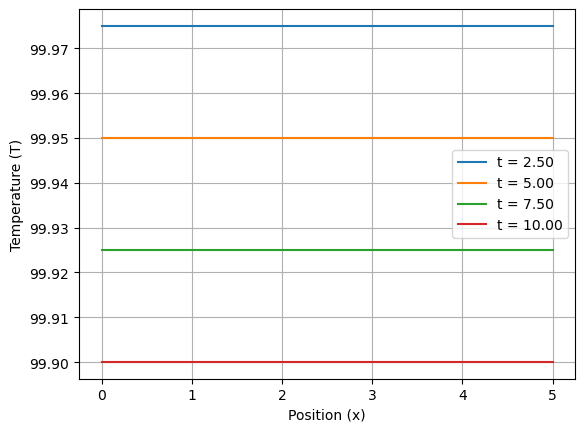

In [45]:
def simulate_thermal_conduction_with_cooling(initial_condition, boundary_condition, Nt=2000):
    L = 5  
    alpha = 0.01  
    T_ambient = 0.0  
    cooling_coefficient = 0.0001  

    dx = 0.1
    dt = 0.005
    Nx = int(L/dx)


    T = initial_condition(Nx)
    T_new = np.copy(T)

    for t in range(1, Nt+1):
        for i in range(1, Nx-1):
            T_new[i] = T[i] + alpha * dt/dx**2 * (T[i+1] - 2*T[i] + T[i-1]) 
            T_new[i] -= cooling_coefficient * (T[i] - T_ambient) * dt
        
        left, right = boundary_condition()
        if left is not None:
            T_new[0] = left
        else:
            T_new[0] -= cooling_coefficient * (T[0] - T_ambient) * dt
        if right is not None:
            T_new[-1] = right
        else: 
            T_new[-1] -= cooling_coefficient * (T[-1] - T_ambient) * dt

        T = T_new.copy()

        if t % 500 == 0:
            plt.plot(np.linspace(0, L, Nx), T, label=f't = {t*dt:.2f}')

    plt.xlabel('Position (x)')
    plt.ylabel('Temperature (T)')
    plt.legend()
    plt.grid(True)
    plt.show()

initial_only = lambda Nx: np.ones(Nx) * 100
boundary_noop = lambda: (None, None)
simulate_thermal_conduction_with_cooling(initial_only, boundary_noop)


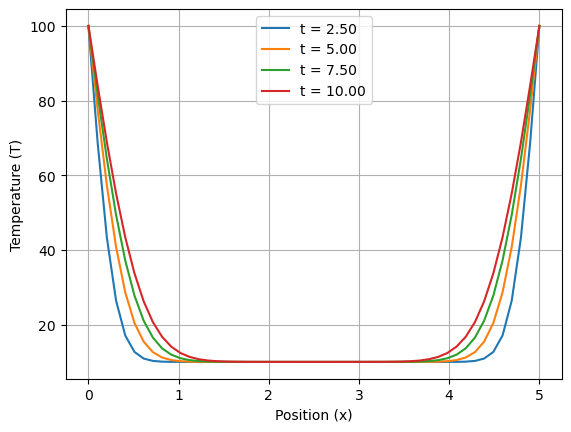

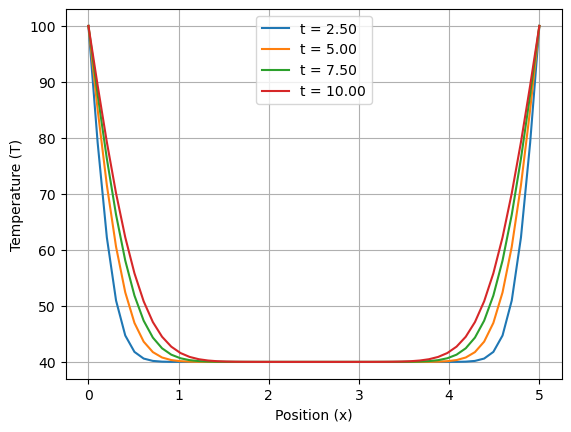

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_thermal_conduction(initial_condition, boundary_condition, Nt=2000):
    L = 5  
    alpha = 0.01

    dx = 0.1
    dt = 0.005
    Nx = int(L/dx)

    T = initial_condition(Nx)
    T_new = np.copy(T)

    for t in range(1, Nt+1):
        for i in range(1, Nx-1):
            T_new[i] = T[i] + alpha * dt/dx**2 * (T[i+1] - 2*T[i] + T[i-1])
        
        left, right = boundary_condition()
        if left is not None:
            T_new[0] = left
        if right is not None:
            T_new[-1] = right

        T = T_new.copy()

        if t % 500 == 0:
            plt.plot(np.linspace(0, L, Nx), T, label=f't = {t*dt:.2f}')

    # Plotting
    plt.xlabel('Position (x)')
    plt.ylabel('Temperature (T)')
    plt.legend()
    plt.grid(True)
    plt.show()

initial_ten = lambda Nx: np.ones(Nx) * 10
boundary_both_ends = lambda: (100, 100)
simulate_thermal_conduction(initial_ten, boundary_both_ends)

initial_twenty = lambda Nx: np.ones(Nx) * 40
simulate_thermal_conduction(initial_twenty, boundary_both_ends)


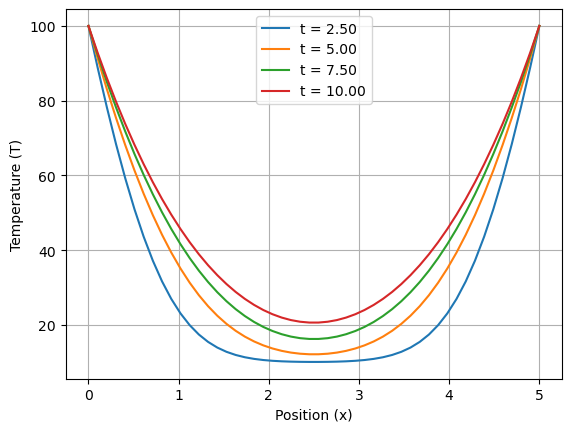

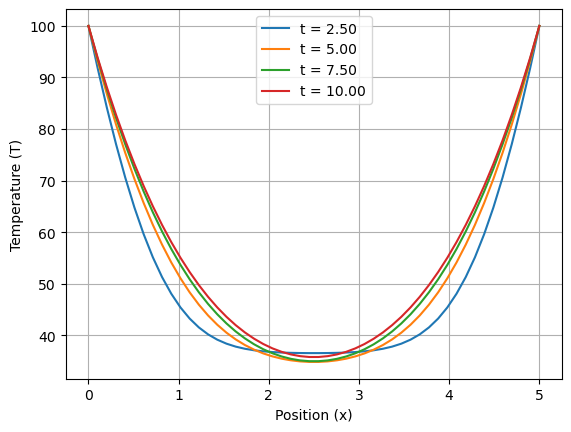

In [43]:
def simulate_thermal_conduction_with_cooling(initial_condition, boundary_condition, Nt=2000):
    L = 5  
    alpha = 0.1  
    T_ambient = 10.0  # 상온
    kappa = 0.05  # 물체의 표면에서의 자연 대류에 의한 냉각 효과나 다른 열 교환 메커니즘

    dx = 0.1
    dt = 0.005
    Nx = int(L/dx)

    T = initial_condition(Nx)
    T_new = np.copy(T)

    for t in range(1, Nt+1):
        for i in range(1, Nx-1):
            T_new[i] = T[i] + alpha * dt/dx**2 * (T[i+1] - 2*T[i] + T[i-1])
            T_new[i] -= kappa * (T[i] - T_ambient) * dt
        
        left, right = boundary_condition()
        if left is not None:
            T_new[0] = left
        if right is not None:
            T_new[-1] = right

        T = T_new.copy()

        if t % 500 == 0:
            plt.plot(np.linspace(0, L, Nx), T, label=f't = {t*dt:.2f}')

    plt.xlabel('Position (x)')
    plt.ylabel('Temperature (T)')
    plt.legend()
    plt.grid(True)
    plt.show()

initial_ten = lambda Nx: np.ones(Nx) * 10
boundary_both_ends = lambda: (100, 100)
simulate_thermal_conduction_with_cooling(initial_ten, boundary_both_ends)

initial_twenty = lambda Nx: np.ones(Nx) * 40
simulate_thermal_conduction_with_cooling(initial_twenty, boundary_both_ends)
